<a href="https://colab.research.google.com/github/duartejr/bootcamp_blue/blob/Gustavo/notebooks/analise_conjunto_valida%C3%A7%C3%A3o.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise do Conjunto Validação

Neste notebook será vericado o desempenho do modelo no conjunto validação.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, mean_squared_log_error

In [ ]:
def metricas(y_teste,y_pred):
  print('R2 Score',r2_score(y_teste,y_pred))
  print('MAE',mean_absolute_error(y_teste,y_pred))
  print('RMSE',np.sqrt(mean_squared_error(y_teste,y_pred)))
  print('MAPE',mean_absolute_percentage_error(y_teste,y_pred))
  print('RMSLE',mean_squared_log_error(y_teste,y_pred,squared=False))

In [ ]:
val = pd.read_csv('/content/drive/MyDrive/Datasets/Cópia de resultados_val.csv')
val.drop(['Unnamed: 0','date','stock'],axis=1,inplace=True)
val.head()

,name,category_1,category_2,category_3,item_condition_id,brand_name,price,shipping,item_description,name_brand_description,y_pred_val
0,la hoodie,Women,Sweaters,Hooded,2,No Brand,9.0,0,Brand new NWOT Never worn Smoke and pet free h...,la hoodie No Brand Brand new NWOT Never worn S...,12.556984
1,earring backs,Women,Jewelry,Earrings,1,No Brand,3.0,1,All brand new soft runner I hand count them to...,earring backs No Brand All brand new soft runn...,3.855730
2,rae dunn taste oval snack plate,Vintage & Collectibles,Housewares,Plate,1,Rae Dunn,30.0,0,Brand new ceramic Rae Dunn TASTE oval snack pl...,rae dunn taste oval snack plate Rae Dunn Brand...,41.811333
3,lipstick bundle mac kat von d etc,Beauty,Makeup,Lips,3,Kat Von D,26.0,0,Maybelline Matte (Clay Crush) Maybelline Matte...,lipstick bundle mac kat von d etc Kat Von D Ma...,21.896980
4,three piece outfit,Kids,Boys 0-24 Mos,Tops & T-Shirts,1,No Brand,3.0,1,Three piece outfit. Size 6 months. New with ta...,three piece outfit No Brand Three piece outfit...,12.083473


In [ ]:
# criando uma coluna da variação da estimativa com o preço real
val['dif']  = (np.abs(val['y_pred_val']-val['price'])/val.price)*100

In [ ]:
val.head()

,name,category_1,category_2,category_3,item_condition_id,brand_name,price,shipping,item_description,name_brand_description,y_pred_val,dif,cluster
0,la hoodie,Women,Sweaters,Hooded,2,No Brand,9.0,0,Brand new NWOT Never worn Smoke and pet free h...,la hoodie No Brand Brand new NWOT Never worn S...,12.556984,39.522044,0
1,earring backs,Women,Jewelry,Earrings,1,No Brand,3.0,1,All brand new soft runner I hand count them to...,earring backs No Brand All brand new soft runn...,3.855730,28.524320,0
2,rae dunn taste oval snack plate,Vintage & Collectibles,Housewares,Plate,1,Rae Dunn,30.0,0,Brand new ceramic Rae Dunn TASTE oval snack pl...,rae dunn taste oval snack plate Rae Dunn Brand...,41.811333,39.371110,0
3,lipstick bundle mac kat von d etc,Beauty,Makeup,Lips,3,Kat Von D,26.0,0,Maybelline Matte (Clay Crush) Maybelline Matte...,lipstick bundle mac kat von d etc Kat Von D Ma...,21.896980,15.780846,0
4,three piece outfit,Kids,Boys 0-24 Mos,Tops & T-Shirts,1,No Brand,3.0,1,Three piece outfit. Size 6 months. New with ta...,three piece outfit No Brand Three piece outfit...,12.083473,302.782433,0


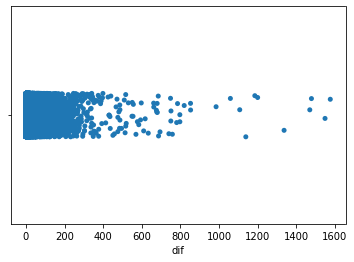

In [ ]:
sns.stripplot(x='dif',data=val)

In [ ]:
cluster = []
for i in val.price:
  if i >= 3 and i <= 42:
    cluster.append(0)
  elif i >= 42.5 and i <= 141:
    cluster.append(1)
  elif i >= 142 and i <= 481:
    cluster.append(3)
  elif i >= 484:
    cluster.append(2)

In [ ]:
val['cluster'] = cluster
val.head()

,name,category_1,category_2,category_3,item_condition_id,brand_name,price,shipping,item_description,name_brand_description,y_pred_val,dif,cluster
0,la hoodie,Women,Sweaters,Hooded,2,No Brand,9.0,0,Brand new NWOT Never worn Smoke and pet free h...,la hoodie No Brand Brand new NWOT Never worn S...,12.556984,39.522044,0
1,earring backs,Women,Jewelry,Earrings,1,No Brand,3.0,1,All brand new soft runner I hand count them to...,earring backs No Brand All brand new soft runn...,3.855730,28.524320,0
2,rae dunn taste oval snack plate,Vintage & Collectibles,Housewares,Plate,1,Rae Dunn,30.0,0,Brand new ceramic Rae Dunn TASTE oval snack pl...,rae dunn taste oval snack plate Rae Dunn Brand...,41.811333,39.371110,0
3,lipstick bundle mac kat von d etc,Beauty,Makeup,Lips,3,Kat Von D,26.0,0,Maybelline Matte (Clay Crush) Maybelline Matte...,lipstick bundle mac kat von d etc Kat Von D Ma...,21.896980,15.780846,0
4,three piece outfit,Kids,Boys 0-24 Mos,Tops & T-Shirts,1,No Brand,3.0,1,Three piece outfit. Size 6 months. New with ta...,three piece outfit No Brand Three piece outfit...,12.083473,302.782433,0


In [ ]:
cl = []
for j in val['cluster'].value_counts().index:
  cl.append(f'cluster {j}')

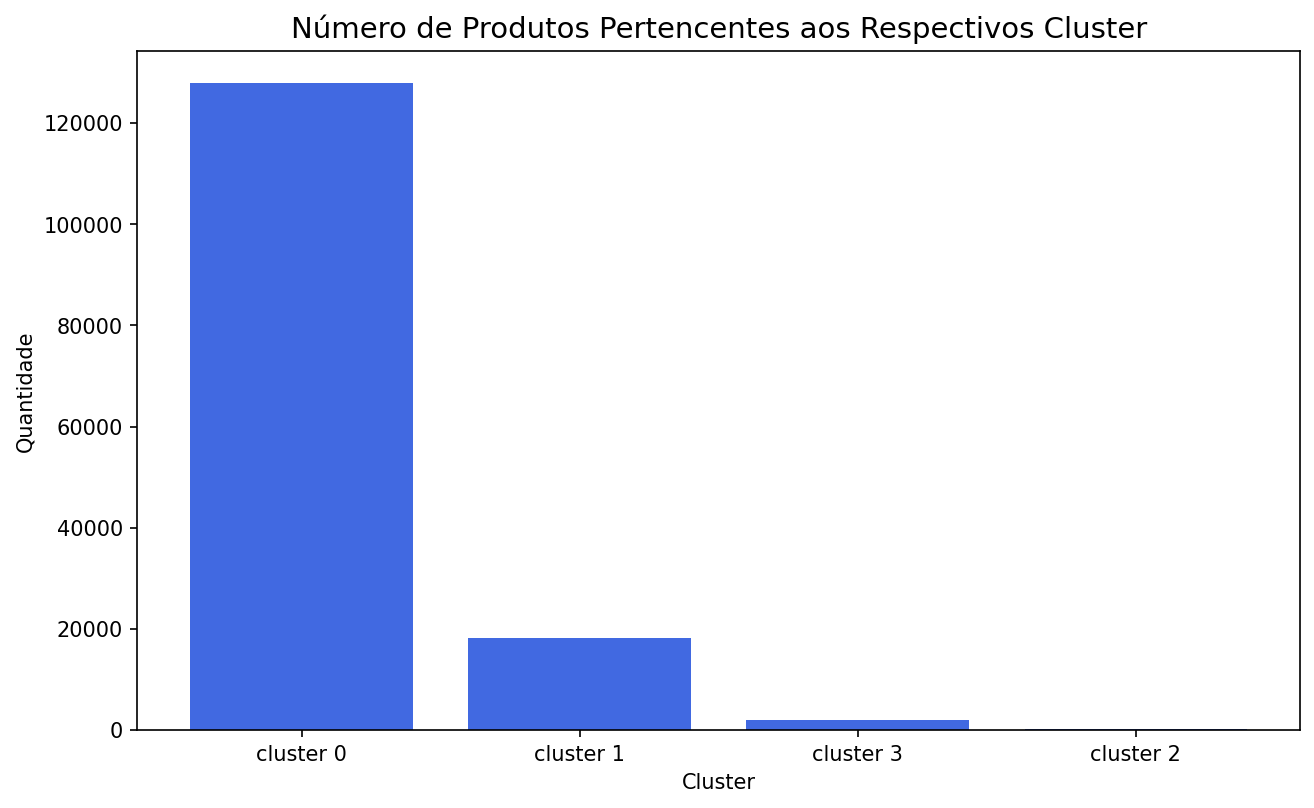

In [ ]:
plt.figure(figsize=(10,6),dpi=150)
plt.title('Número de Produtos Pertencentes aos Respectivos Cluster',
          fontsize=14)
plt.bar(cl,val['cluster'].value_counts(),color='royalblue')
plt.xlabel('Cluster')
plt.ylabel('Quantidade');

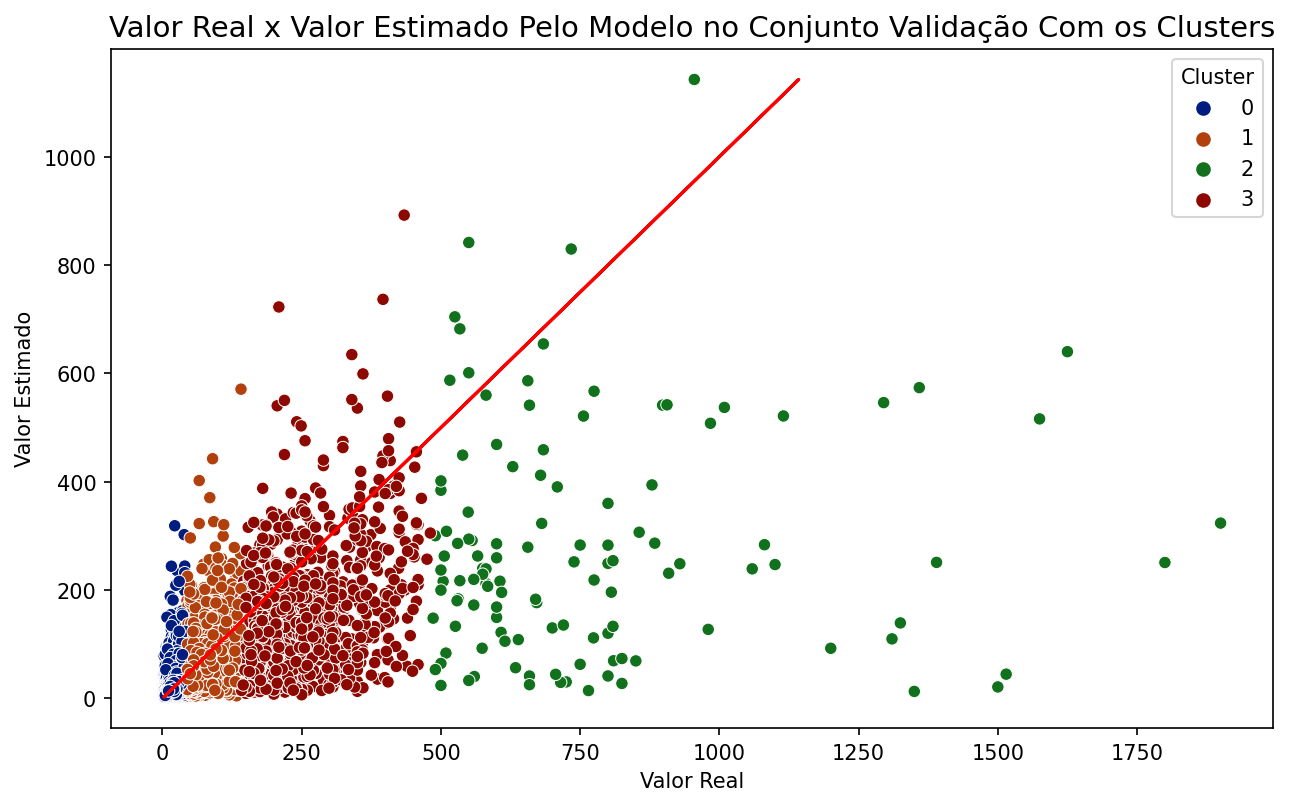

In [ ]:
plt.figure(figsize=(10,6),dpi=150)
plt.title('Valor Real x Valor Estimado Pelo Modelo no Conjunto Validação Com os Clusters',
          fontsize=14)
plt.plot(val.y_pred_val,val.y_pred_val,color='red')
sns.scatterplot(x='price',y='y_pred_val',data=val,hue='cluster',
                palette='dark')
plt.xlabel('Valor Real')
plt.ylabel('Valor Estimado')
plt.legend(title='Cluster');

In [ ]:
metricas(val.price,val.y_pred_val)

R2 Score 0.5386860915402878
MAE 9.567291818823355
RMSE 26.036563430935104
MAPE 0.370075469816758
RMSLE 0.4329860319870835


In [ ]:
metricas(val[val['cluster']!=2]['price'],val[val['cluster']!=2]['y_pred_val'])

R2 Score 0.5965100532822145
MAE 9.171582273587301
RMSE 19.724389632666316
MAPE 0.369866733715701
RMSLE 0.4306828515073322


In [ ]:
estimativa = []
for o in val.dif:
  if o <= 10:
    estimativa.append('boa')
  elif o > 10 and o <= 35:
    estimativa.append('na média')
  else:
    estimativa.append('ruim')

In [ ]:
val['estimativa'] = estimativa

In [ ]:
val.head()

,name,category_1,category_2,category_3,item_condition_id,brand_name,price,shipping,item_description,name_brand_description,y_pred_val,dif,cluster,estimativa
0,la hoodie,Women,Sweaters,Hooded,2,No Brand,9.0,0,Brand new NWOT Never worn Smoke and pet free h...,la hoodie No Brand Brand new NWOT Never worn S...,12.556984,39.522044,0,ruim
1,earring backs,Women,Jewelry,Earrings,1,No Brand,3.0,1,All brand new soft runner I hand count them to...,earring backs No Brand All brand new soft runn...,3.855730,28.524320,0,na média
2,rae dunn taste oval snack plate,Vintage & Collectibles,Housewares,Plate,1,Rae Dunn,30.0,0,Brand new ceramic Rae Dunn TASTE oval snack pl...,rae dunn taste oval snack plate Rae Dunn Brand...,41.811333,39.371110,0,ruim
3,lipstick bundle mac kat von d etc,Beauty,Makeup,Lips,3,Kat Von D,26.0,0,Maybelline Matte (Clay Crush) Maybelline Matte...,lipstick bundle mac kat von d etc Kat Von D Ma...,21.896980,15.780846,0,na média
4,three piece outfit,Kids,Boys 0-24 Mos,Tops & T-Shirts,1,No Brand,3.0,1,Three piece outfit. Size 6 months. New with ta...,three piece outfit No Brand Three piece outfit...,12.083473,302.782433,0,ruim


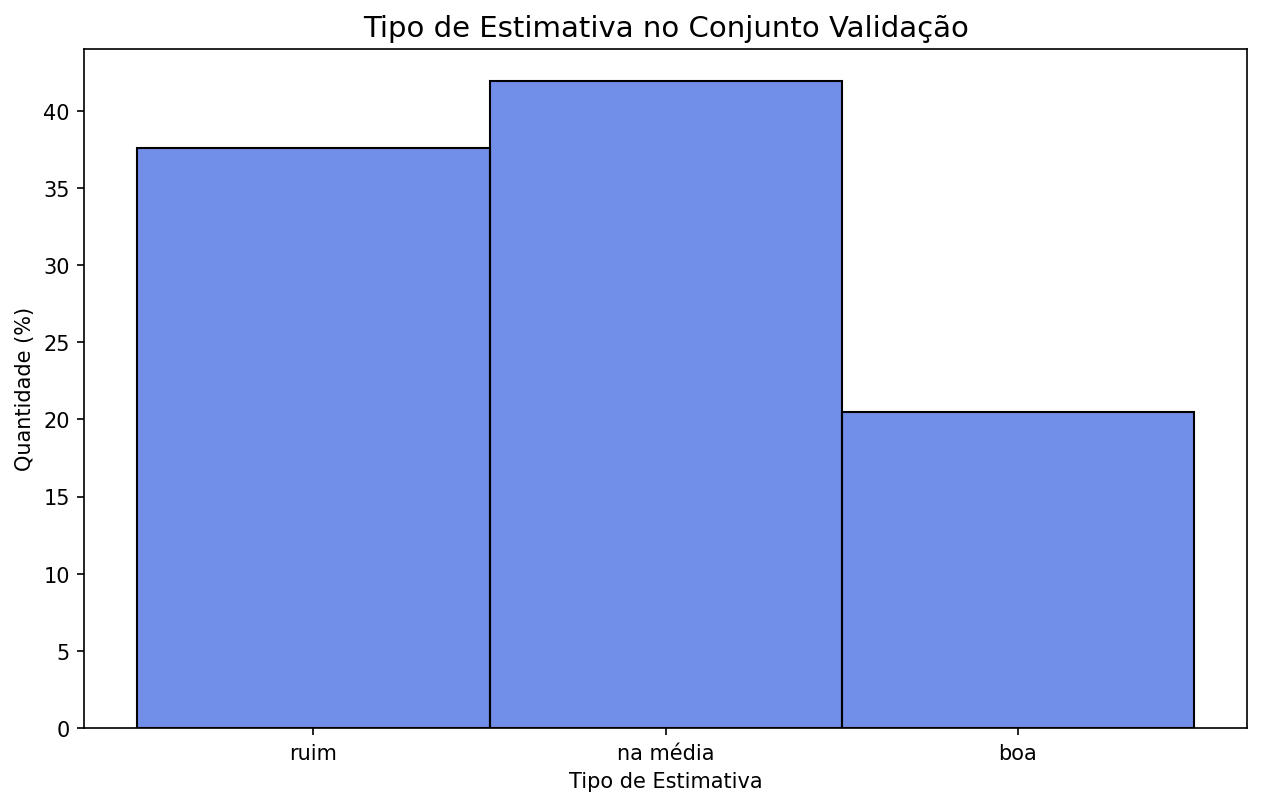

In [ ]:
plt.figure(figsize=(10,6),dpi=150)
plt.title('Tipo de Estimativa no Conjunto Validação',fontsize=14)
sns.histplot(x='estimativa',data=val,color='royalblue',stat='percent')
plt.xlabel('Tipo de Estimativa')
plt.ylabel('Quantidade (%)');

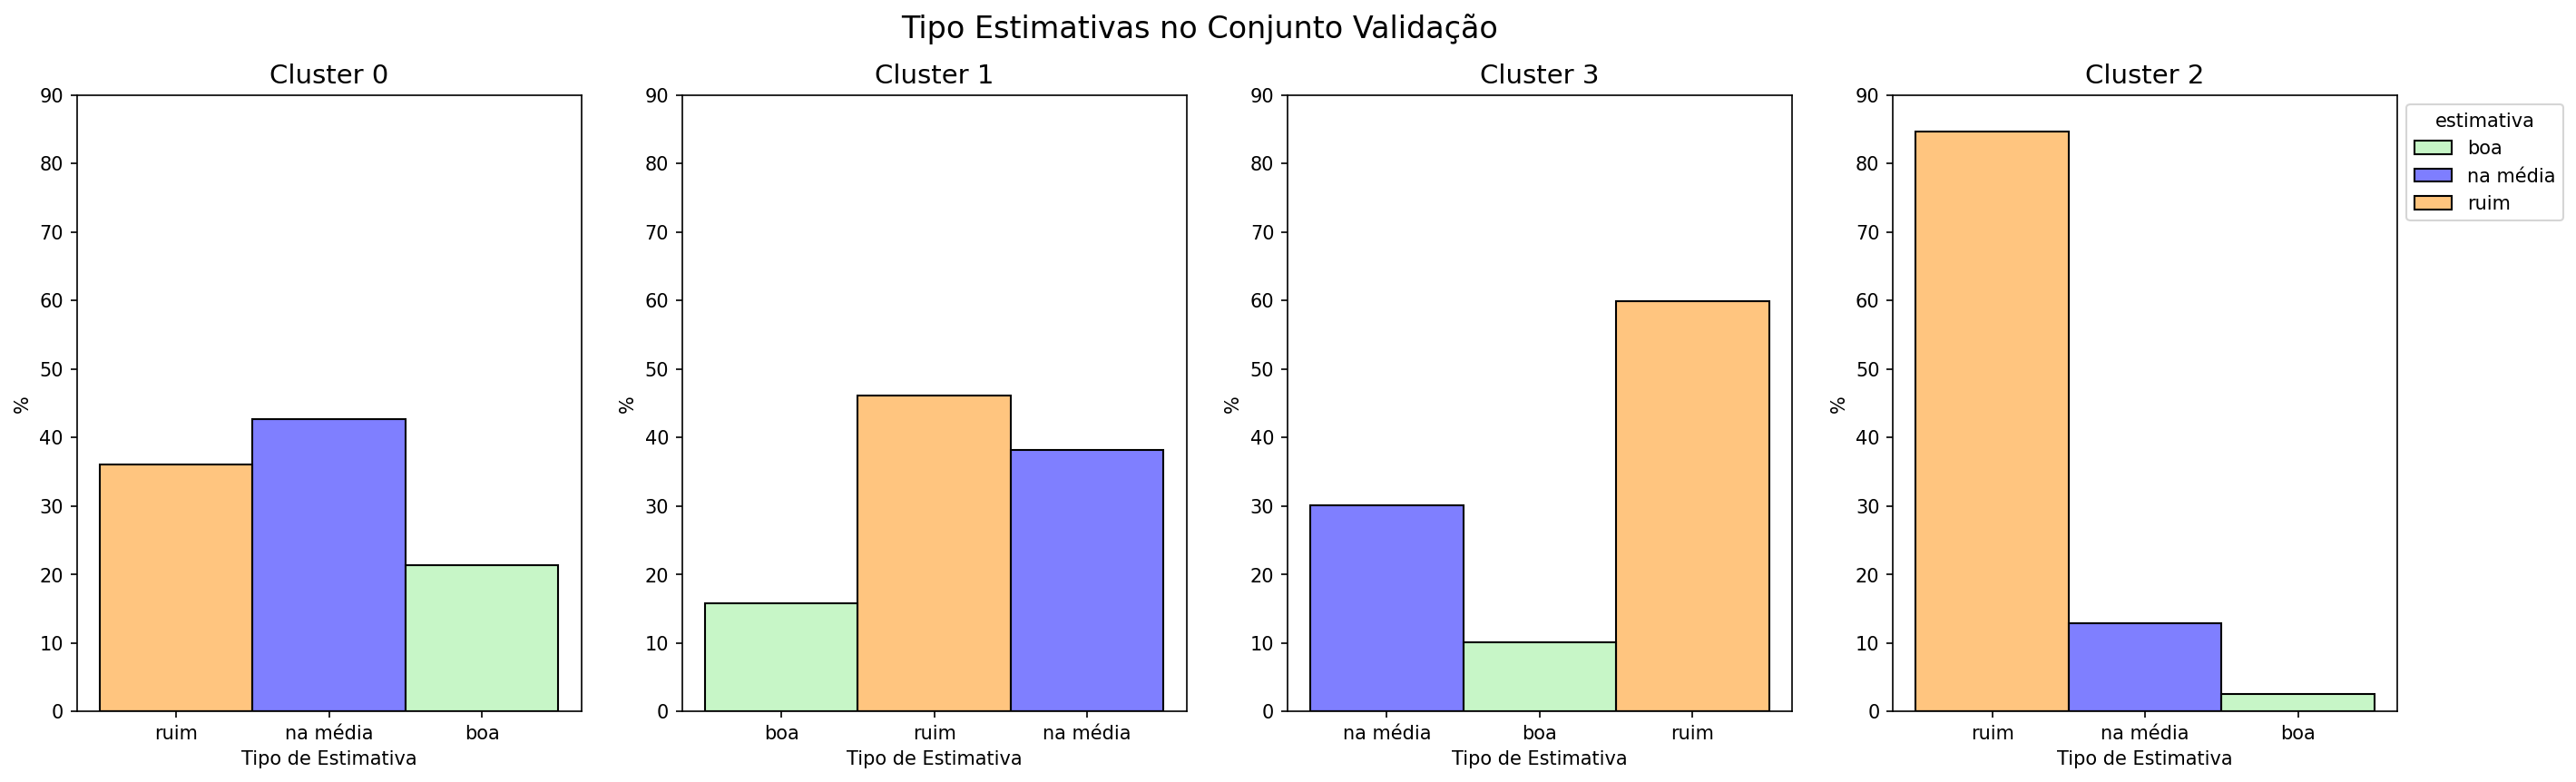

In [ ]:
plt.figure(figsize=(22,6),dpi=150)

plt.suptitle('Tipo Estimativas no Conjunto Validação',fontsize=16)

plt.subplot(1,4,1)
plt.title('Cluster 0',fontsize=14)
fig1 = sns.histplot(x='estimativa',data=val[val['cluster']==0],stat='percent',hue='estimativa',
             palette=['#90ee90','#0000ff','#ff8c00'], hue_order=['boa','na média','ruim'])
plt.legend(frameon=False)
plt.ylim(0,90)
plt.xlabel('Tipo de Estimativa')
plt.ylabel('%')

plt.subplot(1,4,2)
plt.title('Cluster 1',fontsize=14)
sns.histplot(x='estimativa',data=val[val['cluster']==1],stat='percent',hue='estimativa',
             palette=['#90ee90','#0000ff','#ff8c00'], hue_order=['boa','na média','ruim'])
plt.legend(frameon=False)
plt.ylim(0,90)
plt.xlabel('Tipo de Estimativa')
plt.ylabel('%')

plt.subplot(1,4,3)
plt.title('Cluster 3',fontsize=14)
sns.histplot(x='estimativa',data=val[val['cluster']==3],stat='percent',
             hue='estimativa',palette=['#90ee90','#0000ff','#ff8c00'], hue_order=['boa','na média','ruim'])
plt.ylim(0,90)
plt.legend(frameon=False)
plt.xlabel('Tipo de Estimativa')
plt.ylabel('%')

plt.subplot(1,4,4)
plt.title('Cluster 2',fontsize=14)
fig1 =sns.histplot(x='estimativa',data=val[val['cluster']==2],stat='percent',
             hue='estimativa',palette=['#90ee90','#0000ff','#ff8c00'], hue_order=['boa','na média','ruim'])
plt.ylim(0,90)
sns.move_legend(fig1, "upper left", bbox_to_anchor=(1, 1))
plt.xlabel('Tipo de Estimativa')
plt.ylabel('%');

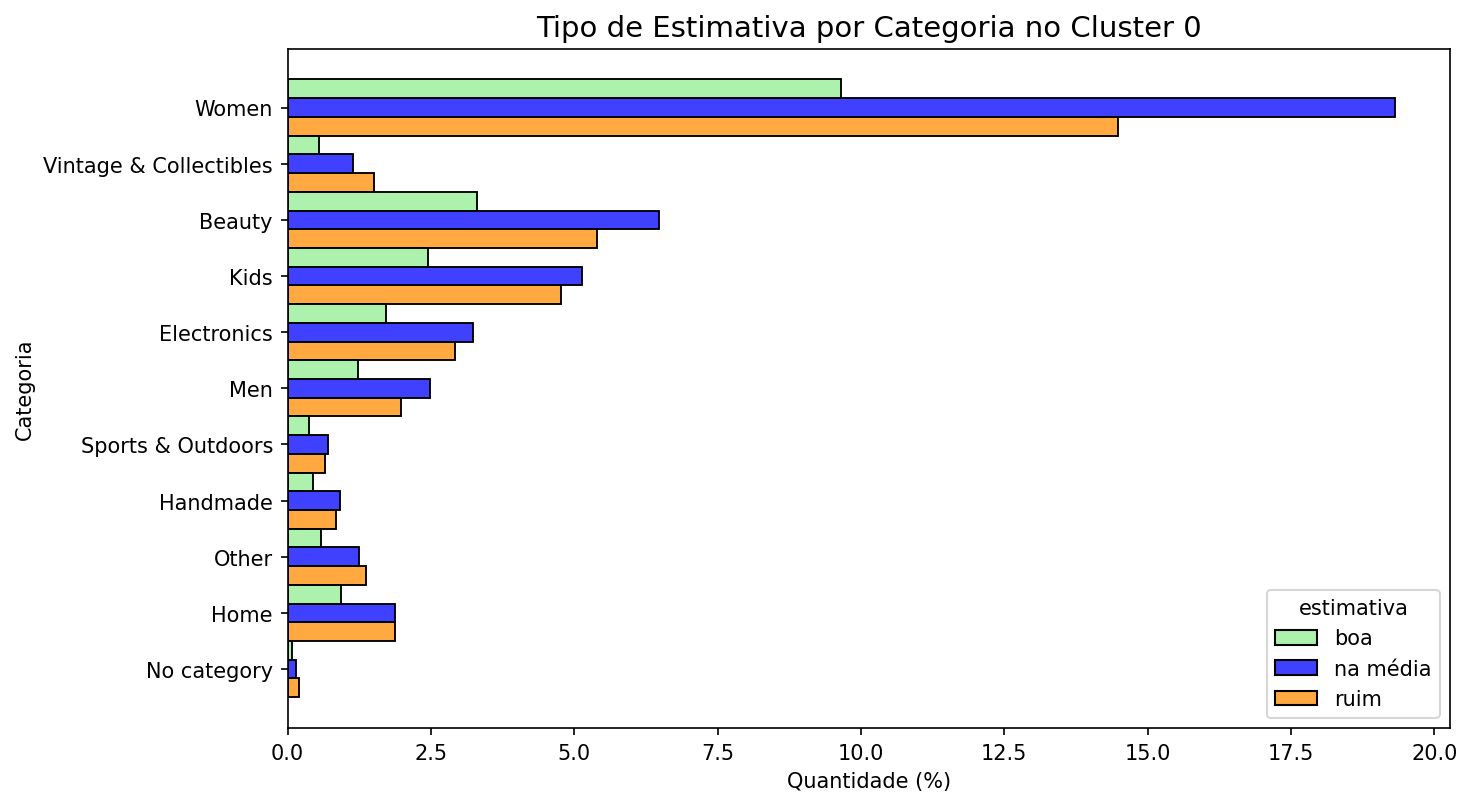

In [ ]:
plt.figure(figsize=(10,6),dpi=150)
plt.title('Tipo de Estimativa por Categoria no Cluster 0',fontsize=14)
sns.histplot(y='category_1',data=val[val['cluster']==0],hue='estimativa',multiple="dodge",stat='percent',
             palette=['#90ee90','#0000ff','#ff8c00'], hue_order=['boa','na média','ruim'])
plt.xlabel('Quantidade (%)')
plt.ylabel('Categoria');

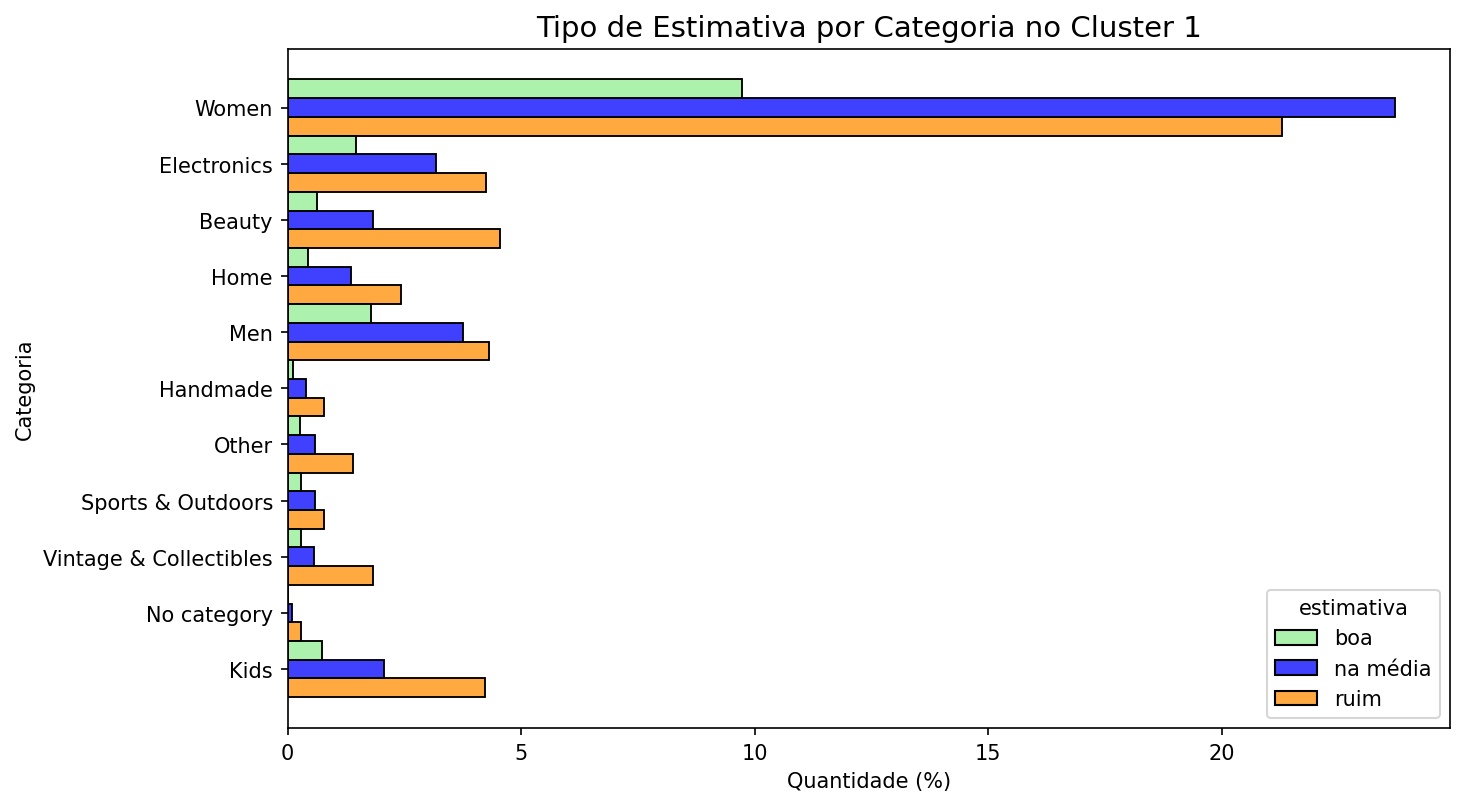

In [ ]:
plt.figure(figsize=(10,6),dpi=150)
plt.title('Tipo de Estimativa por Categoria no Cluster 1',fontsize=14)
sns.histplot(y='category_1',data=val[val['cluster']==1],hue='estimativa',multiple="dodge",stat='percent',
             palette=['#90ee90','#0000ff','#ff8c00'], hue_order=['boa','na média','ruim'])
plt.xlabel('Quantidade (%)')
plt.ylabel('Categoria');

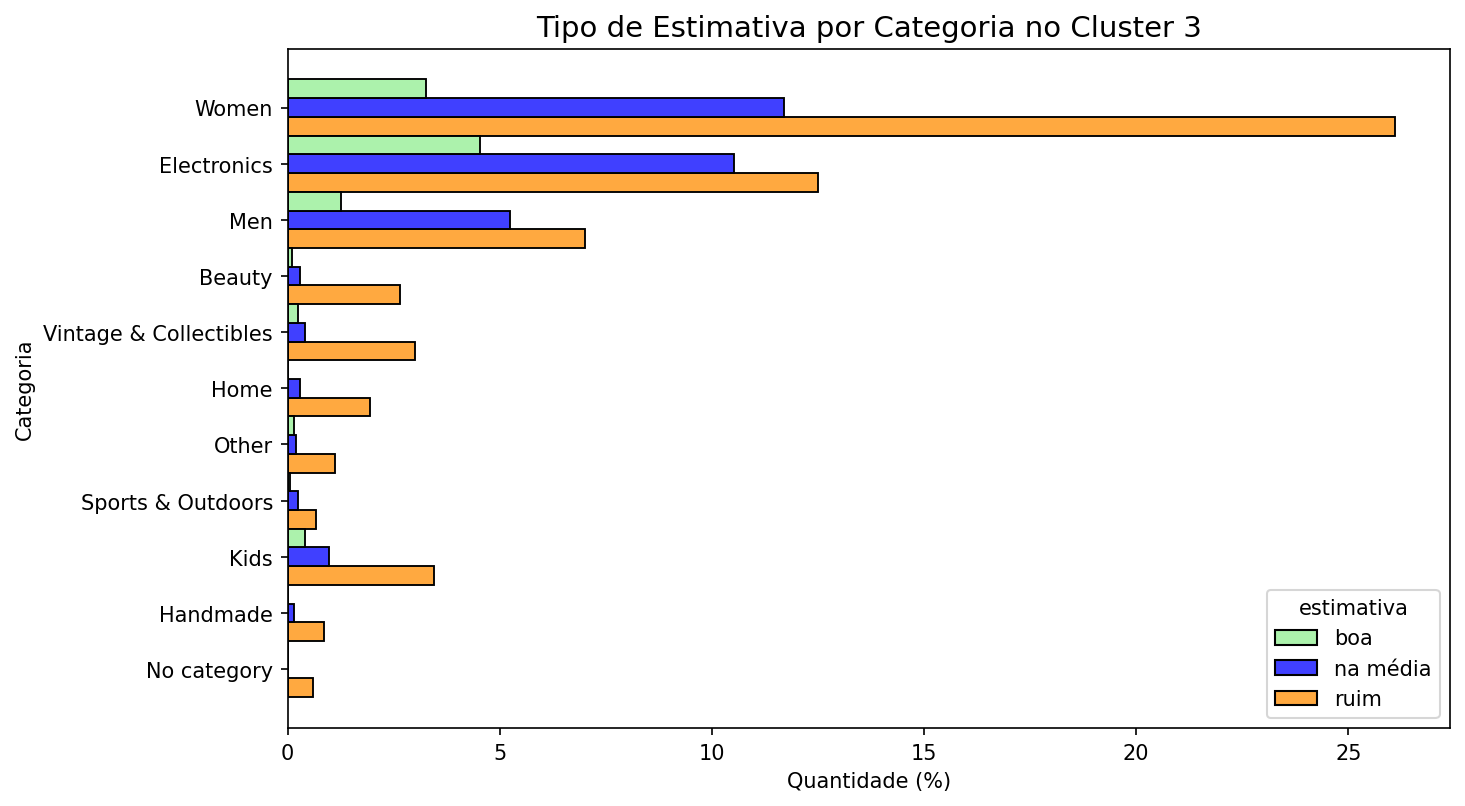

In [ ]:
plt.figure(figsize=(10,6),dpi=150)
plt.title('Tipo de Estimativa por Categoria no Cluster 3',fontsize=14)
sns.histplot(y='category_1',data=val[val['cluster']==3],hue='estimativa',multiple="dodge",stat='percent',
             palette=['#90ee90','#0000ff','#ff8c00'], hue_order=['boa','na média','ruim'])
plt.xlabel('Quantidade (%)')
plt.ylabel('Categoria');

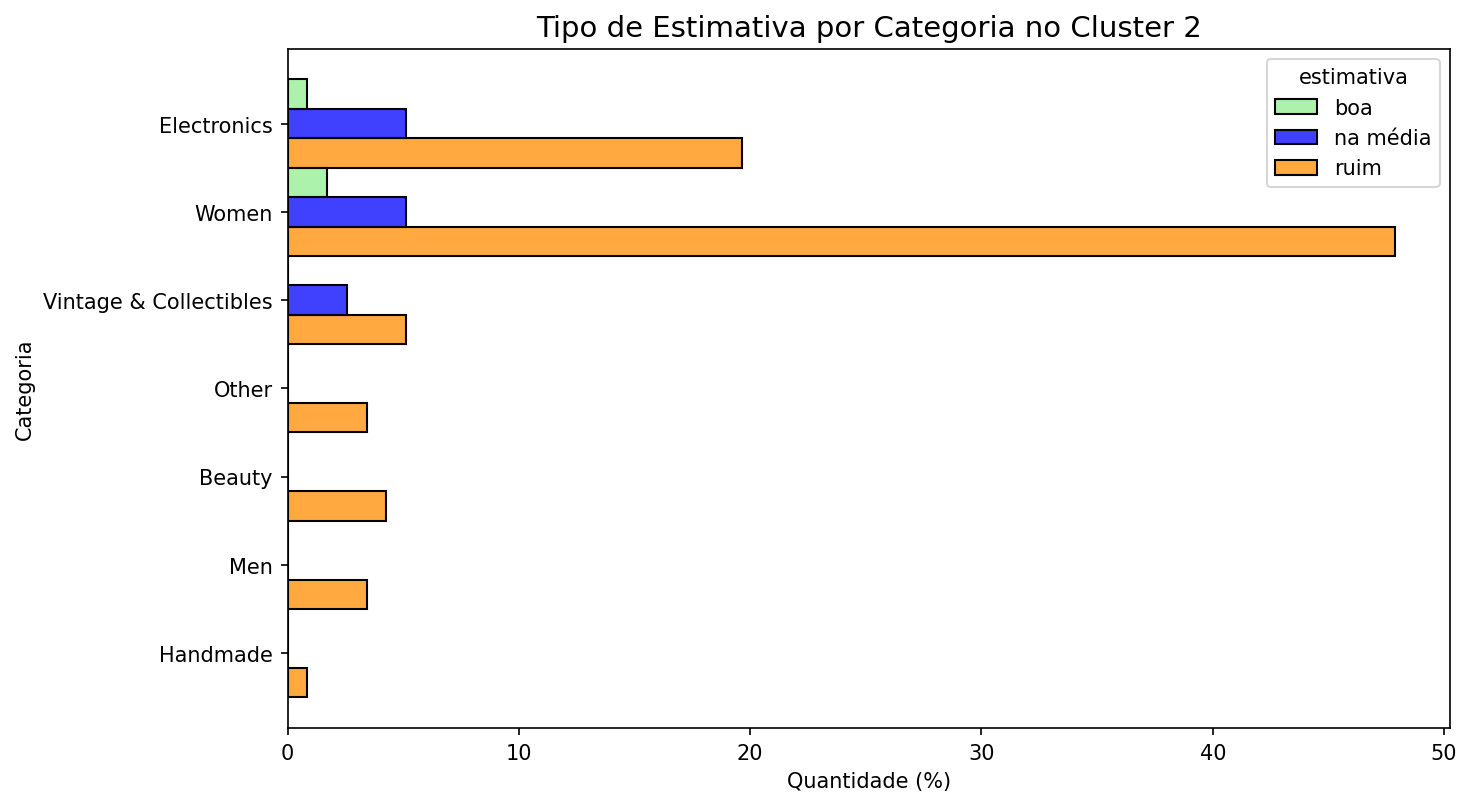

In [ ]:
plt.figure(figsize=(10,6),dpi=150)
plt.title('Tipo de Estimativa por Categoria no Cluster 2',fontsize=14)
sns.histplot(y='category_1',data=val[val['cluster']==2],hue='estimativa',multiple="dodge",stat='percent',
             palette=['#90ee90','#0000ff','#ff8c00'], hue_order=['boa','na média','ruim'])
plt.xlabel('Quantidade (%)')
plt.ylabel('Categoria');

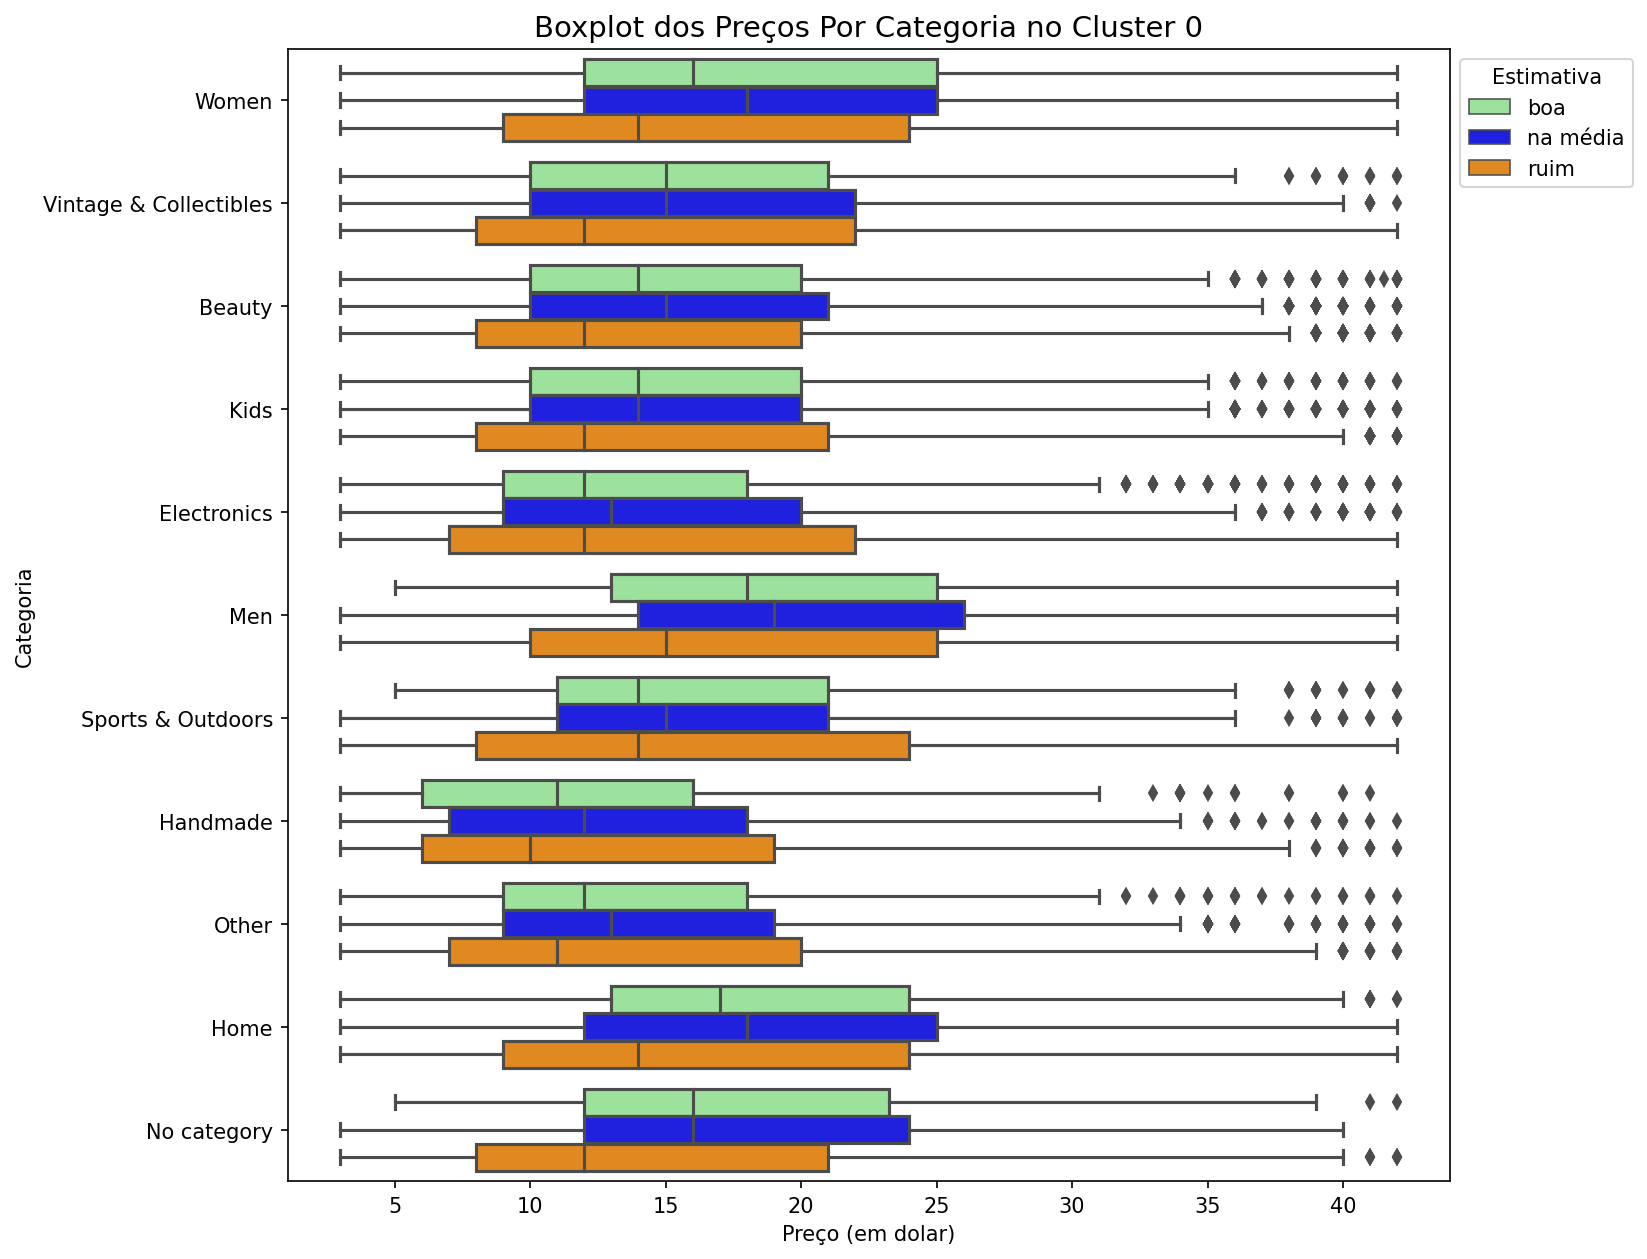

In [ ]:
plt.figure(figsize=(10,10),dpi=150)

ax = sns.boxplot(x='price',y='category_1',data=val[val['cluster']==0],
            hue='estimativa',palette=['#90ee90','#0000ff','#ff8c00'], hue_order=['boa','na média','ruim'])
ax.set_title('Boxplot dos Preços Por Categoria no Cluster 0',fontsize=14)
ax.set_xlabel('Preço (em dolar)')
ax.set_ylabel('Categoria')
ax.legend(title='Estimativa')
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

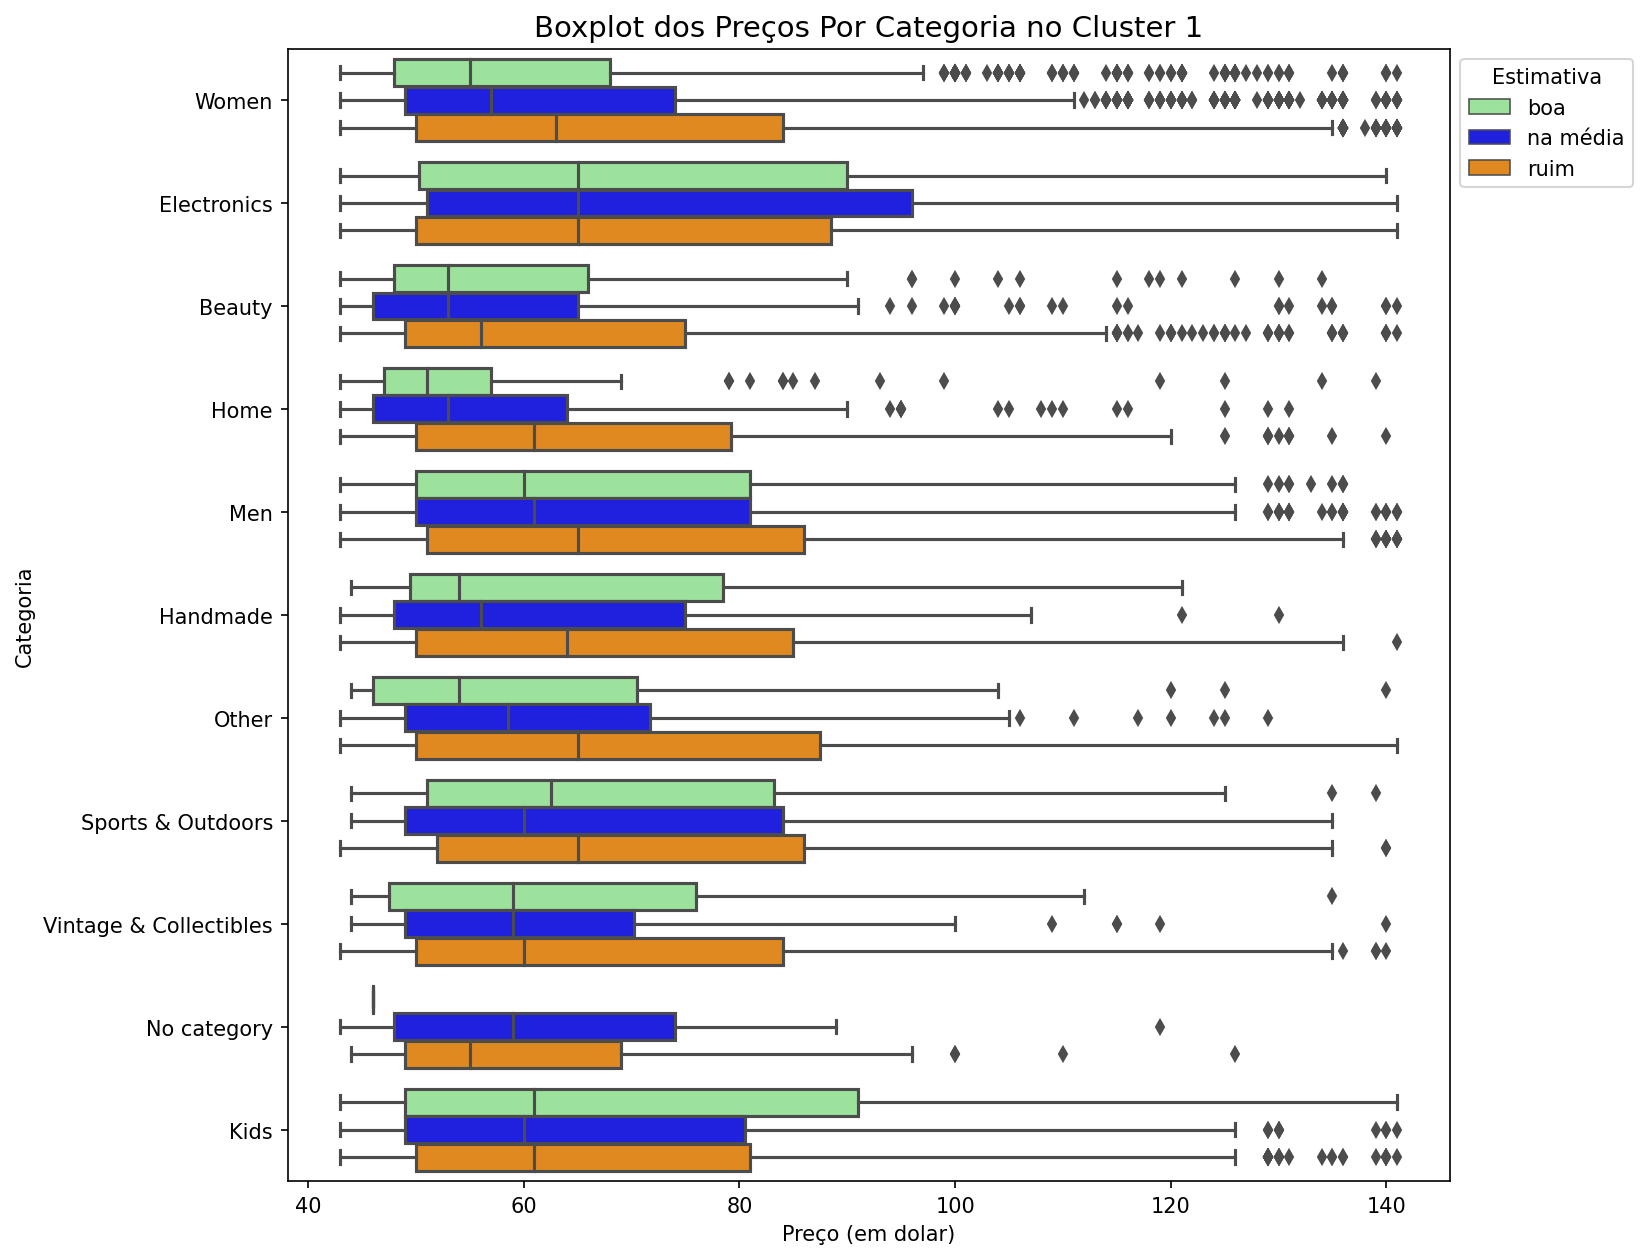

In [ ]:
plt.figure(figsize=(10,10),dpi=150)

ax1 = sns.boxplot(x='price',y='category_1',data=val[val['cluster']==1],
            hue='estimativa',palette=['#90ee90','#0000ff','#ff8c00'], hue_order=['boa','na média','ruim'])
ax1.set_title('Boxplot dos Preços Por Categoria no Cluster 1',fontsize=14)
ax1.set_xlabel('Preço (em dolar)')
ax1.set_ylabel('Categoria')
ax1.legend(title='Estimativa')
sns.move_legend(ax1, "upper left", bbox_to_anchor=(1, 1))

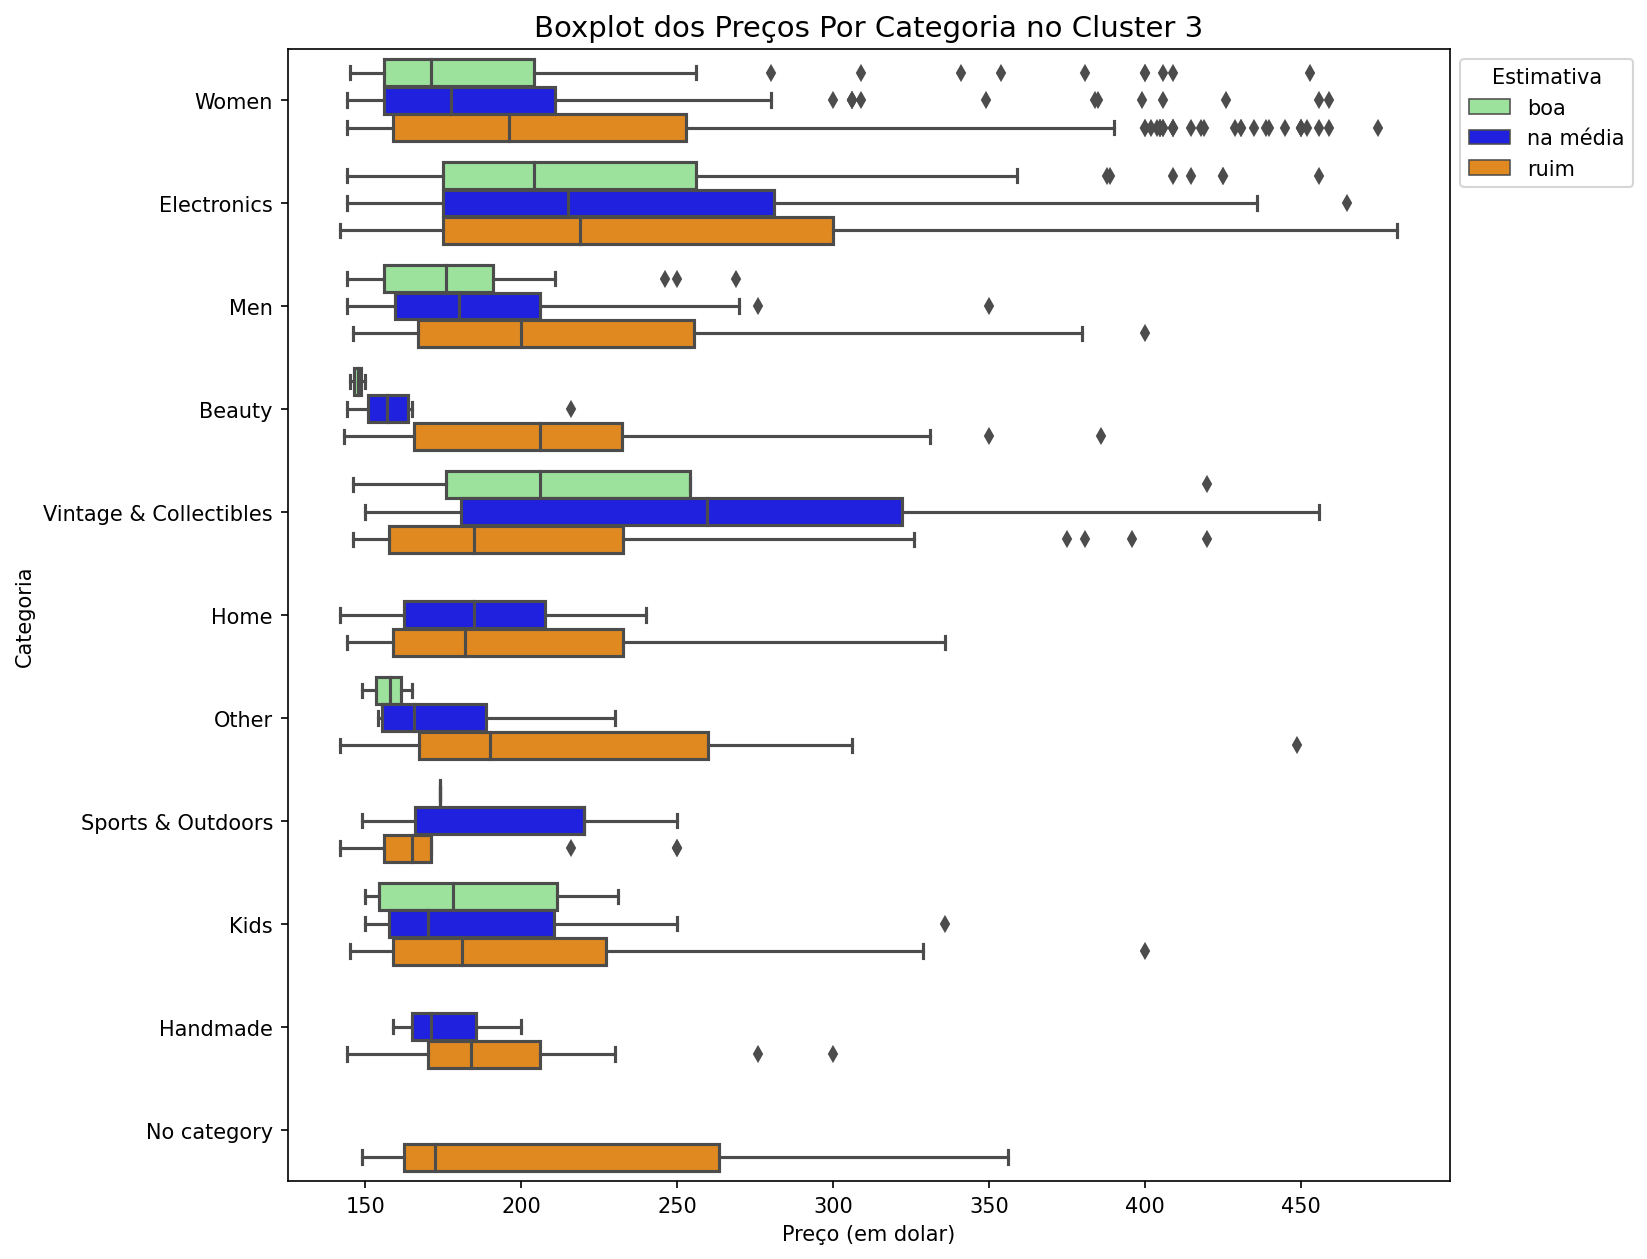

In [ ]:
plt.figure(figsize=(10,10),dpi=150)

ax3 = sns.boxplot(x='price',y='category_1',data=val[val['cluster']==3],
            hue='estimativa',palette=['#90ee90','#0000ff','#ff8c00'], hue_order=['boa','na média','ruim'])
ax3.set_title('Boxplot dos Preços Por Categoria no Cluster 3',fontsize=14)
ax3.set_xlabel('Preço (em dolar)')
ax3.set_ylabel('Categoria')
ax3.legend(title='Estimativa')
sns.move_legend(ax3, "upper left", bbox_to_anchor=(1, 1))

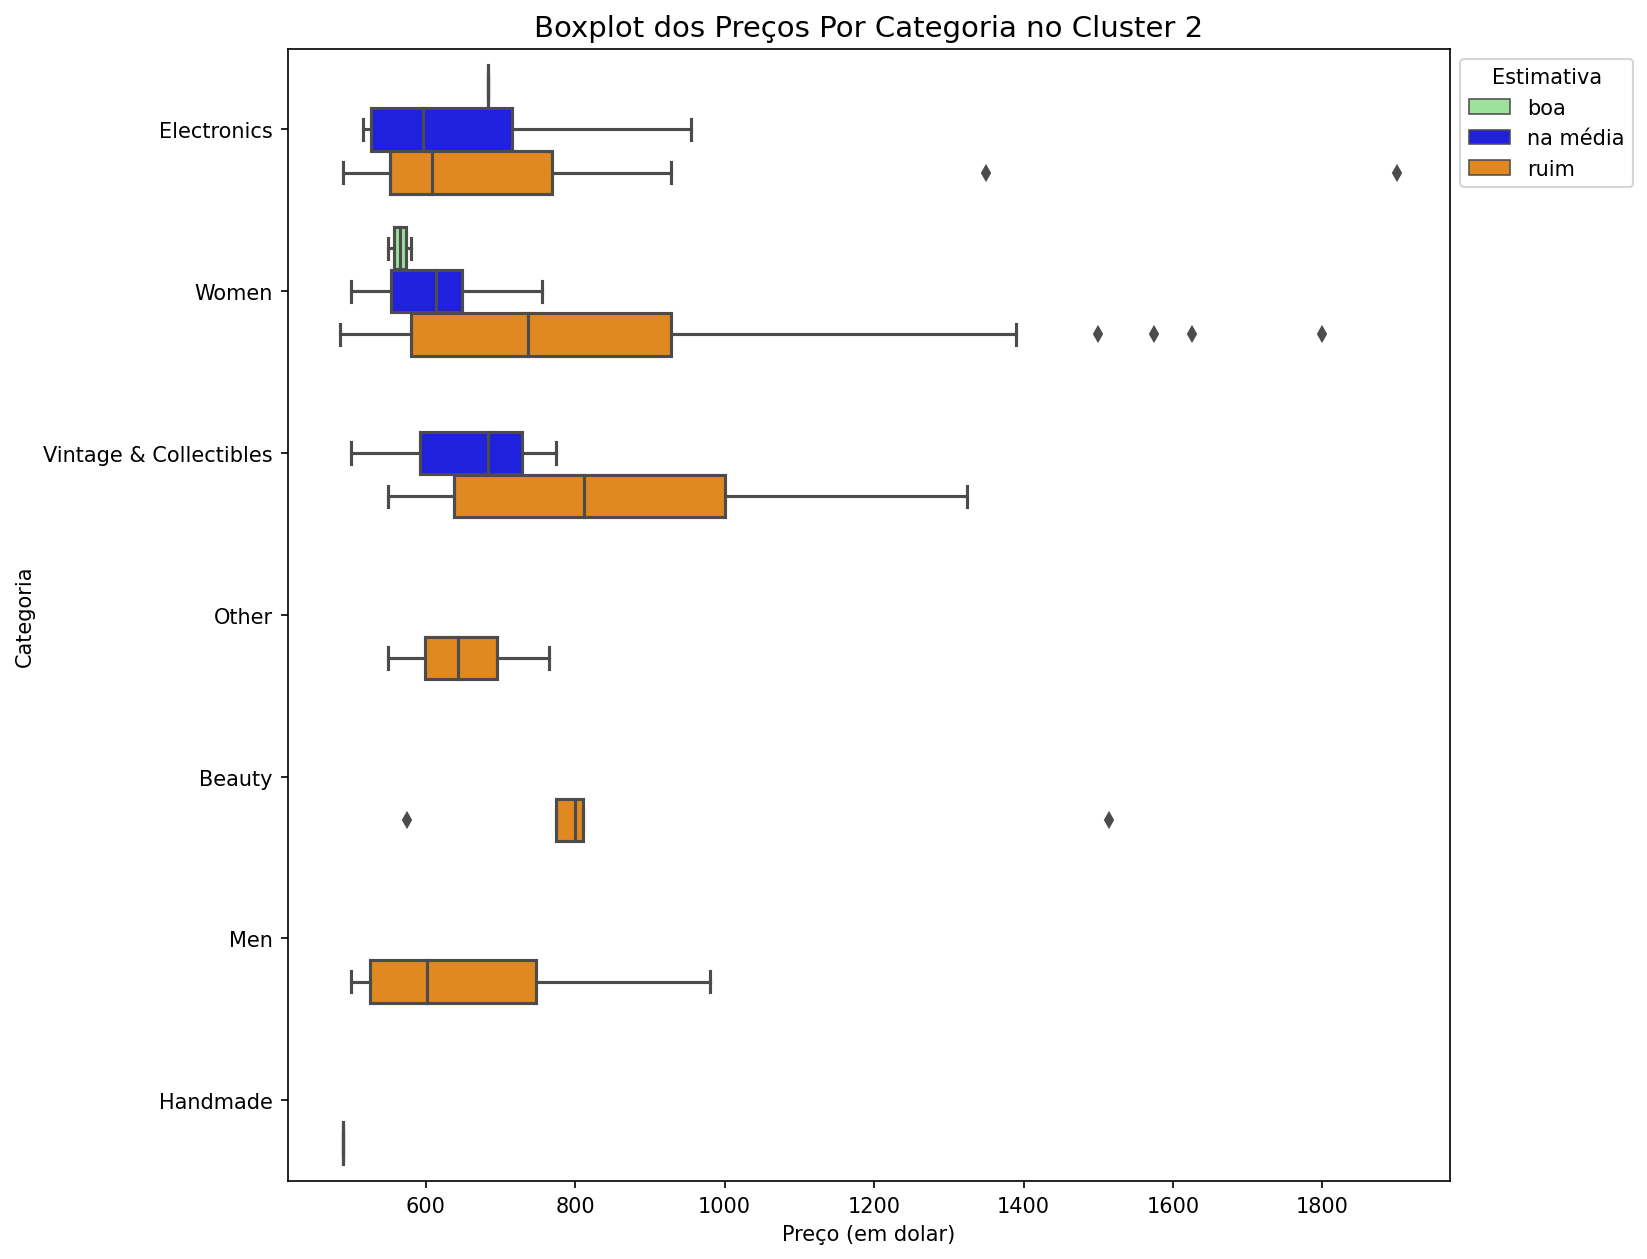

In [ ]:
plt.figure(figsize=(10,10),dpi=150)

ax2 = sns.boxplot(x='price',y='category_1',data=val[val['cluster']==2],
            hue='estimativa',palette=['#90ee90','#0000ff','#ff8c00'], hue_order=['boa','na média','ruim'])
ax2.set_title('Boxplot dos Preços Por Categoria no Cluster 2',fontsize=14)
ax2.set_xlabel('Preço (em dolar)')
ax2.set_ylabel('Categoria')
ax2.legend(title='Estimativa')
sns.move_legend(ax2, "upper left", bbox_to_anchor=(1, 1))